In [1]:
# Note: Original saved in Tahir Sproj folder

# Deep Learning Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as data

# Data Manipulation and Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt

# File and System Interaction
import os
from pathlib import Path
import torch.optim as optim


# Date and Time Handling
import time
import datetime

# Linear Algebra
from torch import linalg as LA

# Neural Architecture
try:
    from torchinfo import summary
except:
    # %pip install torchinfo
    from torchinfo import summary

In [2]:
import torchvision

AttributeError: module 'torch.library' has no attribute 'register_fake'

In [2]:
%load_ext autoreload
%autoreload 2

from python_scripts import dataset_processing
from python_scripts import revised_architecture
from python_scripts import revised_architecture
from python_scripts import training
from python_scripts import logs_and_results
from python_scripts import img_pdf_compiler


In [3]:
from image_py_scripts import dataset_processing # for image inpainting experiment else use python_scripts
from python_scripts import dustmc_training
from python_scripts import logs_and_results
# from python_scripts import img_pdf_compiler
from python_scripts import utils
from python_scripts import DUST_MC
from python_scripts import dustmc_unrolled
from python_scripts import test
from python_scripts import generate_synthetic_data

In [4]:
# Get parameters --> for convhubermc:
def get_default_param(gpu = True):
    params_net = {}
    params_net['size1'] = 150
    params_net['size2'] = 300
    params_net['rank'] = 10
    
    params_net['device'] = 'cpu'
        
    params_net['layers'] = 3
    params_net['CalInGPU'] = gpu
    return params_net

In [32]:
hyper_param_net = dustmc_training.get_hyperparameter_grid('DUSTMC-Net', TrainInstances = 20, ValInstances = 10, BatchSize = 5, 
                                                          ValBatchSize = 2, num_epochs = 1, learning_rate = 0.001,
                                                          K = 5, mu = 0, sigma = 1, m = 50, n = 150, d = 200, T = 300)
params_net = get_default_param(gpu = True)

In [40]:
S = np.load('C:/Users/Talha/OneDrive - Higher Education Commission/Documents/GitHub/ConvHuberMC/Image_Inpainting_Data/BSDS300/images/train/groundtruth/ground_image_MC_train_0.npy')

In [34]:
S = torch.tensor(S, dtype=torch.float32)
S

tensor([[0.4432, 0.4606, 0.4619,  ..., 0.3786, 0.4046, 0.4038],
        [0.4304, 0.4273, 0.3964,  ..., 0.6146, 0.5695, 0.5617],
        [0.5911, 0.6706, 0.6233,  ..., 0.6153, 0.6450, 0.6677],
        ...,
        [0.3389, 0.3429, 0.3490,  ..., 0.3370, 0.3325, 0.3336],
        [0.3448, 0.3605, 0.3729,  ..., 0.3534, 0.3495, 0.3466],
        [0.3497, 0.3455, 0.3385,  ..., 0.3705, 0.3588, 0.3548]])

In [35]:
model = dustmc_unrolled.DustNet(hyper_param_net)
output = model(S)
print(f'output: {output}')

temp: tensor([[26.2777, 26.1571, 26.0337,  ..., 26.0422, 26.2115, 26.3763],
        [28.4338, 28.2997, 28.2033,  ..., 27.8294, 27.9909, 28.1690],
        [29.1352, 29.0287, 28.9693,  ..., 28.1126, 28.2597, 28.3977],
        ...,
        [26.6270, 26.5234, 26.5101,  ..., 26.2259, 26.4667, 26.6049],
        [27.2468, 27.0892, 26.9628,  ..., 27.3947, 27.4906, 27.5043],
        [27.3159, 27.2775, 27.1616,  ..., 26.7482, 26.8916, 27.1538]],
       grad_fn=<MmBackward0>)
E: tensor([[-0.5713,  0.3164,  0.3598,  ...,  1.0556,  0.0824, -0.3922],
        [-0.8732,  0.1430, -1.0879,  ...,  0.6010, -0.9477, -0.2205],
        [-0.1285, -0.0303,  1.1991,  ...,  0.2408, -1.9754,  0.2783],
        ...,
        [ 1.5748, -0.6907,  1.2877,  ...,  1.7356,  0.6636,  1.0354],
        [-0.2789,  1.1304,  2.2119,  ...,  0.5905, -0.4349,  0.7970],
        [ 0.9099, -0.4159,  0.2486,  ..., -0.8512,  0.6422, -1.5041]])
X: tensor([[25.7064, 26.4735, 26.3935,  ..., 27.0979, 26.2939, 25.9842],
        [27.5606, 28

In [45]:
image = io.imread('C:/Users/Talha/OneDrive - Higher Education Commission/Documents/GitHub/ConvHuberMC/Image_Inpainting_Data/BSDS300/images/train/2092.jpg')
image = color.rgb2gray(img_as_float(image))
image = np.resize(image, (150, 300))
image

array([[0.49476745, 0.49084588, 0.49084588, ..., 0.41996784, 0.41882902,
        0.42275059],
       [0.42275059, 0.42275059, 0.41882902, ..., 0.46478667, 0.46870824,
        0.46870824],
       [0.46870824, 0.46870824, 0.46870824, ..., 0.37683059, 0.37683059,
        0.37290902],
       ...,
       [0.51462118, 0.51854275, 0.51854275, ..., 0.55944   , 0.56000549,
        0.56000549],
       [0.55722275, 0.55722275, 0.55722275, ..., 0.47876157, 0.47876157,
        0.47876157],
       [0.47091843, 0.47091843, 0.47091843, ..., 0.54375373, 0.54375373,
        0.54375373]])

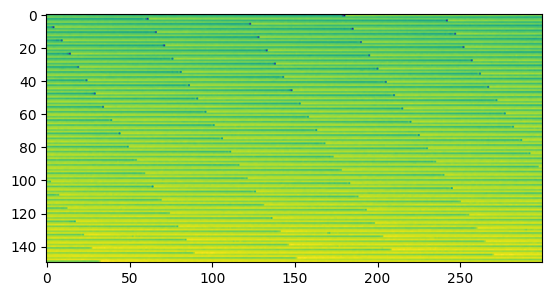

In [46]:
from skimage import io, color, img_as_float

plt.imshow(image)
plt.show()

In [47]:
DD = model.D
DD

Parameter containing:
tensor([[-2.3437,  0.3709,  0.8309,  ...,  0.5226, -0.6293, -1.0167],
        [ 0.1324,  0.5427,  0.4180,  ...,  1.1552, -1.3193, -0.1803],
        [ 0.0230, -0.3504,  0.3418,  ..., -0.9727, -0.3765, -0.8085],
        ...,
        [ 0.7870,  0.3761, -0.4403,  ..., -0.4106,  1.1280, -0.3658],
        [-0.7051, -0.9030, -0.2016,  ...,  0.4929,  0.8515,  0.3369],
        [-0.9991, -0.7435, -0.1986,  ..., -0.3659, -0.0128,  0.1930]],
       requires_grad=True)

In [51]:
D_np = DD.detach().numpy()


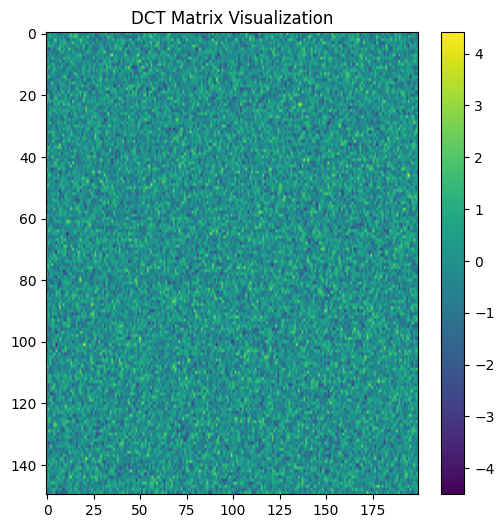

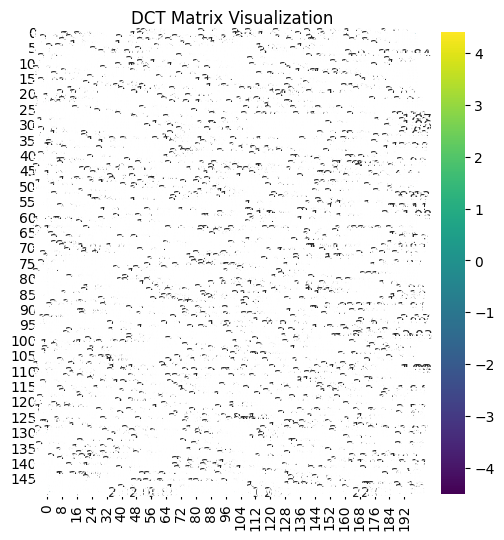

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Option 1: Using imshow
plt.figure(figsize=(6, 6))
plt.imshow(D_np, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("DCT Matrix Visualization")
plt.show()

# Option 2: Using seaborn's heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(D_np, annot=True, fmt=".2f", cmap='viridis')
plt.title("DCT Matrix Visualization")
plt.show()

In [3]:
# Setting up some global variables

ROOT = os.getcwd().replace('\\', '/') + '/HuberMC_Data'
# ROOT = 'C:/Users/Talha/OneDrive - Higher Education Commission/Documents/GitHub/ConvHuberMC/HuberMC_Data'
# ROOT = 'C:/Users/HP/GitHub Workspace/ConvHuberMC-Net/HuberMC_Data'
TRY = 'Try 1'
SESSION = 'Session 3'
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device, ROOT

('cpu',
 'c:/Users/Talha/OneDrive - Higher Education Commission/Documents/GitHub/ConvHuberMC/HuberMC_Data')

Testing Training Loop

In [4]:
# Get parameters --> for convhubermc:
def get_default_param(gpu = True, model = 'HuberMC-Net'):
    params_net = {}
    params_net['size1'] = 150
    params_net['size2'] = 300
    params_net['rank'] = 10
    
    params_net['device'] = device

    if model == 'HuberMC-Net':
        params_net['hubreg_iters'] = 2
    elif model == 'LP1':
        params_net['inner_iters'] = 2
        
    params_net['layers'] = 3
    params_net['kernel'] = (3, 3)
    
    params_net['CalInGPU'] = gpu
    
    return params_net

In [5]:
class Conv2dC(nn.Module):
    def __init__(self, kernel): # Empirically found to be self.kernel to maintain same shape
        super(Conv2dC, self).__init__()

        # Given a kernel size of 2 dimensions, we calculate the padding through the formula (k[0] - 1)/2 --> this helps maintain the shape as close as possible
        pad0 = int((kernel[0] - 1) / 2)
        pad1 = int((kernel[1] - 1) / 2)
        if torch.cuda.is_available():
            self.convR = nn.Conv2d(1, 1, (kernel[0], kernel[0]), (1, 1), (pad0, pad1), groups = 1).cuda()
        else:
            self.convR = nn.Conv2d(1, 1, (kernel[0], kernel[0]), (1, 1), (pad0, pad1), groups = 1).to('cpu')
        
        # Initialize weights to zero
        self.convR.weight.data.zero_()

        # For a 3x3 kernel, set the center value to 1 to approximate an identity operation
        if kernel[0] == 3 and kernel[1] == 3:
            self.convR.weight.data[0, 0, 1, 1] = 1

        # Set bias to zero
        self.convR.bias.data.zero_()
        # At groups = in_channels, each input channel is convolved with its own set of filters (of size out_channels/in_channels)

    def forward(self, x):
        # get the height dimension and convert it to int
        n = x.shape[-1]
        # This line creates a new tensor xR by slicing the input tensor along the columns dimension (0:n). The None adds an extra dimension, making xR a 4-dimensional tensor with size (1, 1, H, W).
        # The 1's make sure the consistency with the conv operation which is expecting a in_channels, out_channels, which are set to 1
        xR = x[None, None, :, 0:n].clone()
        xR = self.convR(xR)
        # Removing the extra dimension
        xR = xR.squeeze()
        x = xR
        return x

In [6]:
conv_op = Conv2dC(kernel = (3, 3))

In [7]:
test = torch.randn(150, 10)
test2 = test * 0.01

test[:10, :10], test2[:10, :10]

(tensor([[ 6.8881e-01,  1.1912e-01,  3.6523e+00,  1.0410e-01, -2.3979e-01,
          -1.5193e-01, -5.8620e-01,  7.5602e-01, -1.1917e+00, -5.3552e-01],
         [ 3.8613e-01, -3.3701e-01, -2.4367e+00,  8.0928e-01,  2.0553e+00,
          -7.5597e-01, -9.8536e-01, -3.1243e-01, -2.0315e+00, -1.0597e+00],
         [ 1.4733e-01, -5.2234e-01,  4.1729e-01,  8.2231e-01, -1.6066e-01,
           8.6506e-02,  7.8791e-01, -3.0938e-01,  1.8582e+00,  1.8808e+00],
         [-9.4668e-01,  2.7926e-03,  1.0760e+00, -1.8669e+00, -5.7272e-01,
           2.0427e+00,  6.1051e-03,  6.9947e-01,  4.8721e-01,  1.0490e+00],
         [ 4.6475e-01,  1.9995e+00,  7.7303e-03, -7.7050e-01,  2.2461e-01,
          -4.0902e-01,  4.0365e-01, -3.2824e-01, -2.1672e-01, -5.8281e-01],
         [-1.1063e-01,  5.0243e-01, -9.1922e-02, -2.8413e-01,  2.0263e+00,
           9.9791e-01,  5.1758e-01, -1.7228e+00, -1.5064e+00, -1.5869e+00],
         [-3.3347e-01,  3.2403e-01,  4.9551e-01,  1.1229e-02, -1.1195e+00,
           1.1633e+

In [8]:
test3, test4 = conv_op(test), conv_op(test2)

test3[:10, :10], test4[:10, :10]

(tensor([[ 6.8881e-01,  1.1912e-01,  3.6523e+00,  1.0410e-01, -2.3979e-01,
          -1.5193e-01, -5.8620e-01,  7.5602e-01, -1.1917e+00, -5.3552e-01],
         [ 3.8613e-01, -3.3701e-01, -2.4367e+00,  8.0928e-01,  2.0553e+00,
          -7.5597e-01, -9.8536e-01, -3.1243e-01, -2.0315e+00, -1.0597e+00],
         [ 1.4733e-01, -5.2234e-01,  4.1729e-01,  8.2231e-01, -1.6066e-01,
           8.6506e-02,  7.8791e-01, -3.0938e-01,  1.8582e+00,  1.8808e+00],
         [-9.4668e-01,  2.7926e-03,  1.0760e+00, -1.8669e+00, -5.7272e-01,
           2.0427e+00,  6.1051e-03,  6.9947e-01,  4.8721e-01,  1.0490e+00],
         [ 4.6475e-01,  1.9995e+00,  7.7303e-03, -7.7050e-01,  2.2461e-01,
          -4.0902e-01,  4.0365e-01, -3.2824e-01, -2.1672e-01, -5.8281e-01],
         [-1.1063e-01,  5.0243e-01, -9.1922e-02, -2.8413e-01,  2.0263e+00,
           9.9791e-01,  5.1758e-01, -1.7228e+00, -1.5064e+00, -1.5869e+00],
         [-3.3347e-01,  3.2403e-01,  4.9551e-01,  1.1229e-02, -1.1195e+00,
           1.1633e+

In [9]:
# seed = 123
# torch.manual_seed(seed)
# target = (torch.randn(30, 50))
# input_tensor = target * torch.bernoulli(torch.full((30, 50), 0.2))
# model = architecture.UnfoldedNet_Huber(params = get_default_param(False))

# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters())

# model.train()
# output = model(input_tensor)

# loss = (criterion(output, target))/torch.square(torch.norm(target, p = 'fro'))
# optimizer.zero_grad()
# print(f'loss before backward: {loss}, loss.grad: {loss.requires_grad}')
# loss.backward()
# print(f'loss: {loss}')
# print("\nGradients after one epoch:")
# for name, param in model.named_parameters():
#     print(f'name: {name}\t\tgradient: {param.grad}')
# optimizer.step()

In [10]:
# # Create a input_tensor of random indices
# shuffled_indices = torch.randperm(input_tensor.nelement())

# # Index the original input_tensor with these shuffled indices
# shuffled_input_tensor = input_tensor.view(-1)[shuffled_indices].view(input_tensor.size())

# output = model(shuffled_input_tensor)

# loss = (criterion(output, target))/torch.square(torch.norm(target, p = 'fro'))
# optimizer.zero_grad()
# print(f'loss before backward: {loss}, loss.grad: {loss.requires_grad}')
# loss.backward()
# print(f'loss: {loss}')
# print("\nGradients after one epoch:")
# for name, param in model.named_parameters():
#     print(f'name: {name}\t\tgradient: {param.grad}')
# optimizer.step()

In [11]:
# # Create a input_tensor of random indices
# shuffled_indices = torch.randperm(input_tensor.nelement())

# # Index the original input_tensor with these shuffled indices
# shuffled_input_tensor = input_tensor.view(-1)[shuffled_indices].view(input_tensor.size())

# output = model(shuffled_input_tensor)

# loss = (criterion(output, target))/torch.square(torch.norm(target, p = 'fro'))
# optimizer.zero_grad()
# print(f'loss before backward: {loss}, loss.grad: {loss.requires_grad}')
# loss.backward()
# print(f'loss: {loss}')
# print("\nGradients after one epoch:")
# for name, param in model.named_parameters():
#     print(f'name: {name}\t\tgradient: {param.grad}')
# optimizer.step()

In [5]:
model = revised_architecture.UnfoldedNet_Huber(params = get_default_param(False, model = 'HuberMC-Net'))
model

UnfoldedNet_Huber(
  (conv_layers): ModuleList(
    (0-449): 450 x Conv2dC(
      (convR): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
  )
  (huber_obj): Sequential(
    (0): Huber(
      (conv_layers): ModuleList(
        (0-449): 450 x Conv2dC(
          (convR): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
    )
    (1): Huber(
      (conv_layers): ModuleList(
        (0-449): 450 x Conv2dC(
          (convR): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
    )
    (2): Huber(
      (conv_layers): ModuleList(
        (0-449): 450 x Conv2dC(
          (convR): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
    )
  )
)

In [6]:
model.forward(torch.randn(150, 300) * torch.bernoulli(torch.full((150, 300), 0.2)))
# model.forward(torch.randn(30, 50) * torch.bernoulli(torch.full((30, 50), 0.2)))

tensor([[ 1.3247,  0.8520, -0.2201,  ..., -0.6270, -0.1814, -1.6500],
        [-1.0912,  3.5768,  0.8193,  ...,  0.5229,  0.4067, -0.5315],
        [ 0.6682,  0.6256, -1.0360,  ..., -1.3081,  0.1484, -2.7451],
        ...,
        [-0.5249, -4.6546, -0.9147,  ..., -2.1172, -0.3177,  1.8541],
        [ 1.2629, -0.7277,  0.5484,  ...,  0.8169, -0.6259, -0.3517],
        [-0.6537, -0.0446, -0.8610,  ..., -1.5067, -0.3294,  1.4745]])

In [7]:
summary(model, input_size = [150, 300])

Layer (type:depth-idx)                   Output Shape              Param #
UnfoldedNet_Huber                        [150, 300]                --
├─Sequential: 1-1                        [150, 300]                --
│    └─Huber: 2-1                        [150, 300]                4,500
│    └─Huber: 2-4                        --                        (recursive)
│    │    └─ModuleList: 3-3              --                        (recursive)
│    └─Huber: 2-3                        [150, 300]                4,500
│    └─Huber: 2-4                        --                        (recursive)
│    │    └─ModuleList: 3-3              --                        (recursive)
│    └─Huber: 2-5                        [150, 300]                4,500
│    │    └─ModuleList: 3-3              --                        (recursive)
Total params: 17,990
Trainable params: 0
Non-trainable params: 17,990
Total mult-adds (Units.MEGABYTES): 27
Input size (MB): 0.18
Forward/backward pass size (MB): 21.60
Pa

Project Name: Try 1 HuberMC-Net Q 20.0% DB 3.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:13:41, 

Epoch [1/1], Mean Training Loss:7.30697e-05, Mean Validation Loss:2.86323e-05


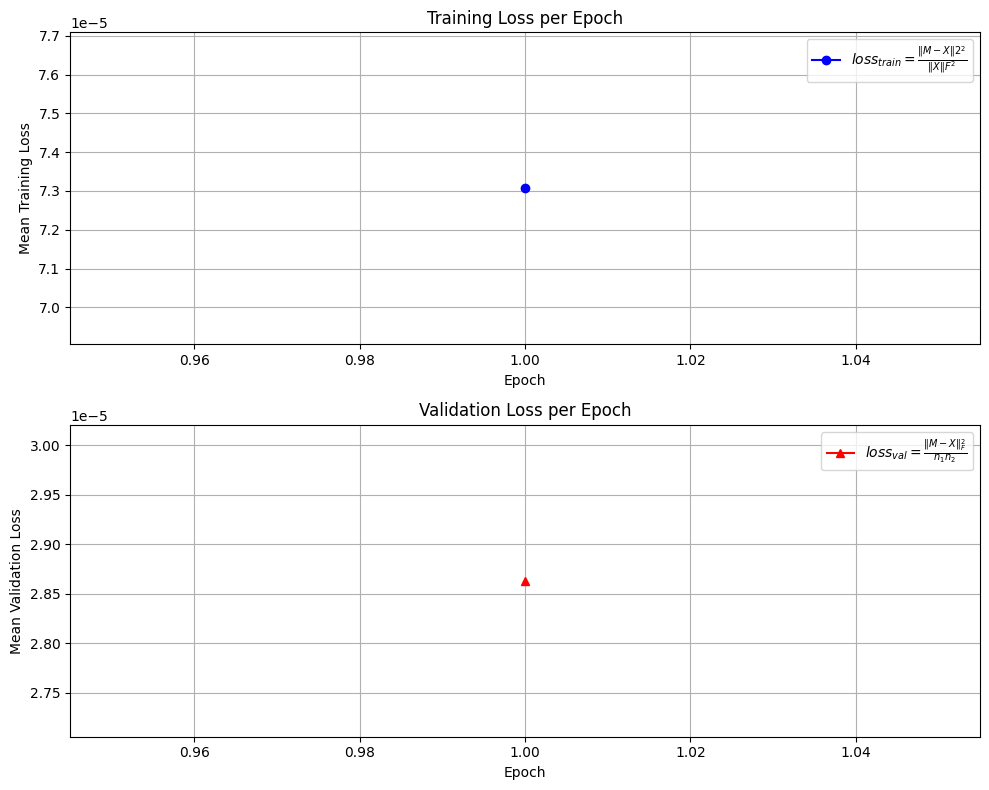

Project Name: Try 1 HuberMC-Net Q 20.0% DB 5.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:14:30, 

Epoch [1/1], Mean Training Loss:7.30608e-05, Mean Validation Loss:2.75911e-05


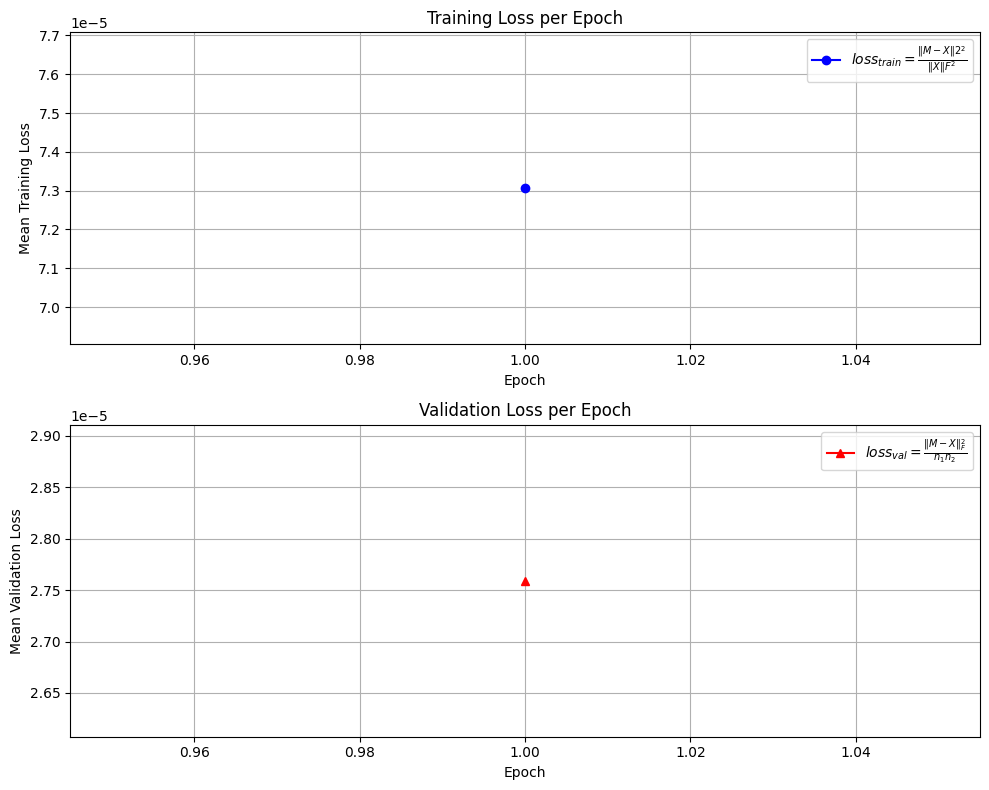

Project Name: Try 1 HuberMC-Net Q 20.0% DB 6.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:15:19, 

Epoch [1/1], Mean Training Loss:6.46720e-05, Mean Validation Loss:2.75810e-05


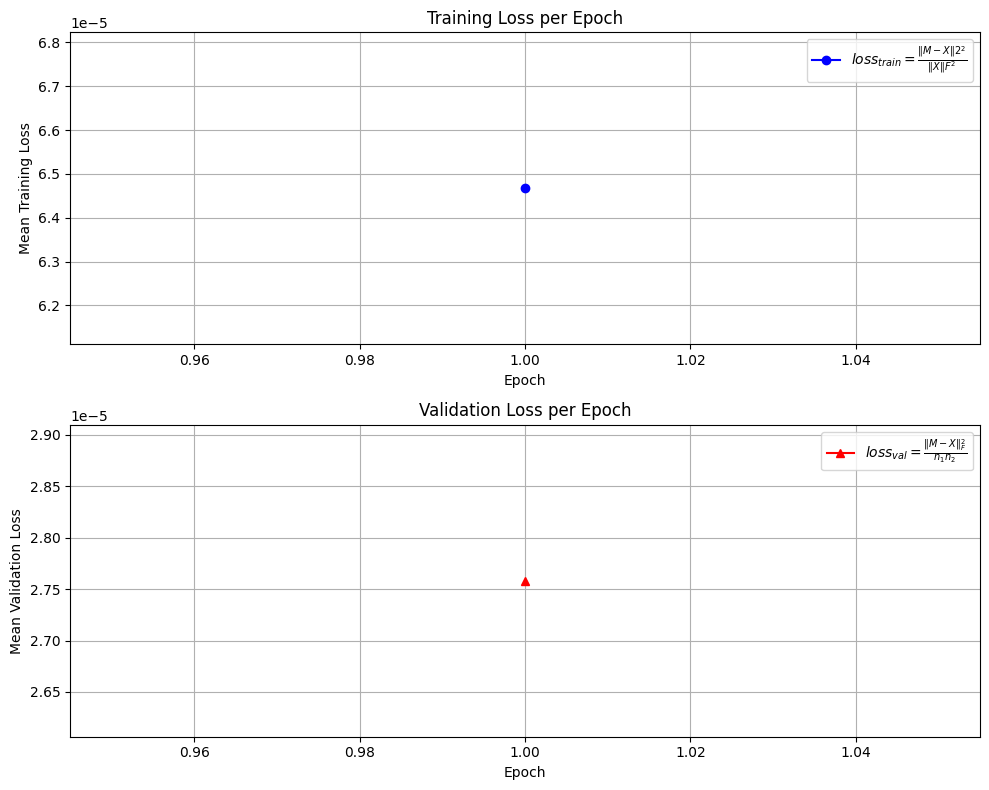

Project Name: Try 1 HuberMC-Net Q 20.0% DB 9.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:16:16, 

Epoch [1/1], Mean Training Loss:6.45433e-05, Mean Validation Loss:2.58441e-05


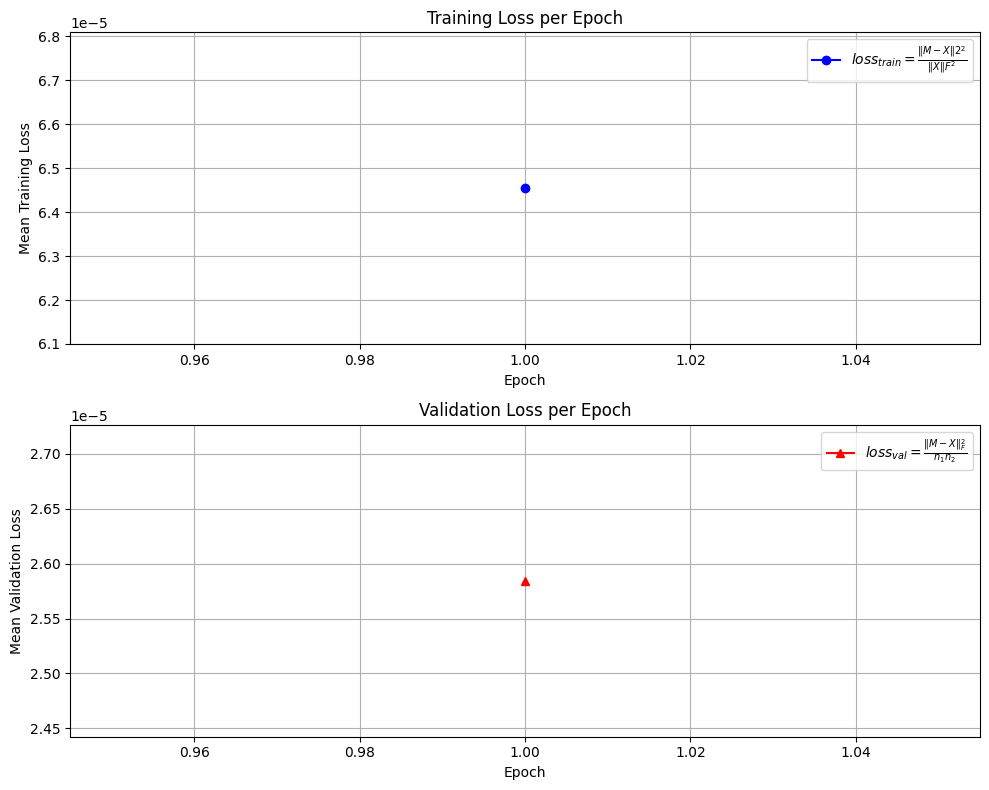

Project Name: Try 1 HuberMC-Net Q 30.0% DB 3.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:17:13, 

Epoch [1/1], Mean Training Loss:2.63045e-05, Mean Validation Loss:1.04191e-05


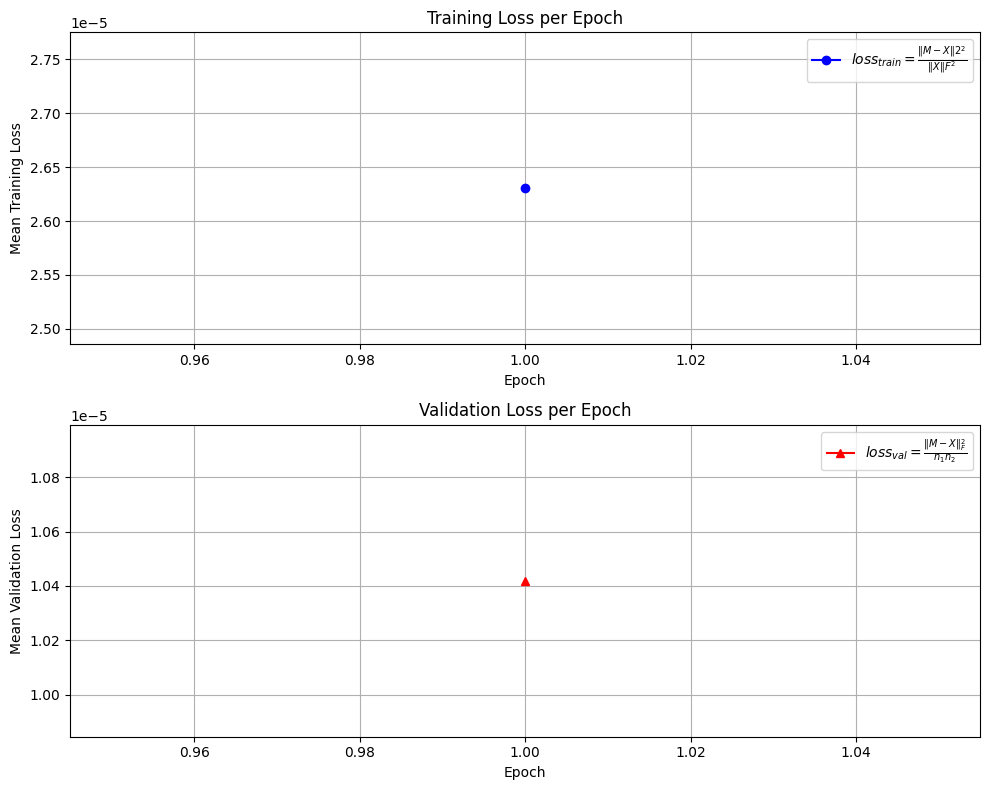

Project Name: Try 1 HuberMC-Net Q 30.0% DB 5.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:18:10, 

Epoch [1/1], Mean Training Loss:2.41805e-05, Mean Validation Loss:1.04661e-05


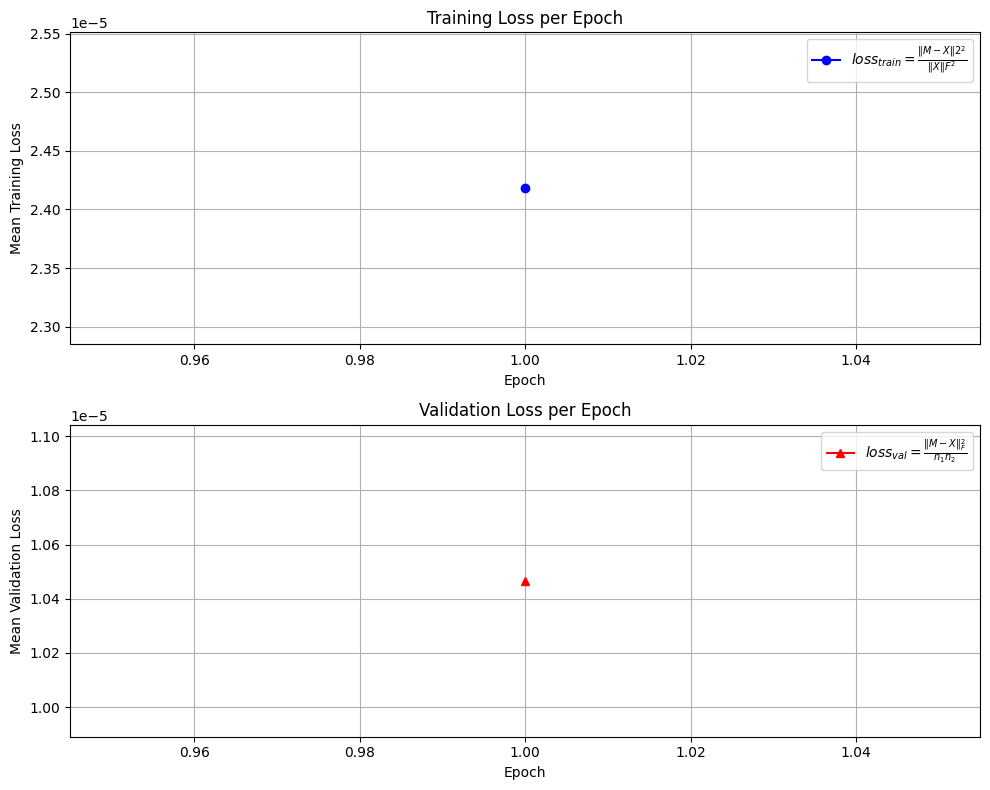

Project Name: Try 1 HuberMC-Net Q 30.0% DB 6.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:18:59, 

Epoch [1/1], Mean Training Loss:2.34401e-05, Mean Validation Loss:9.87742e-06


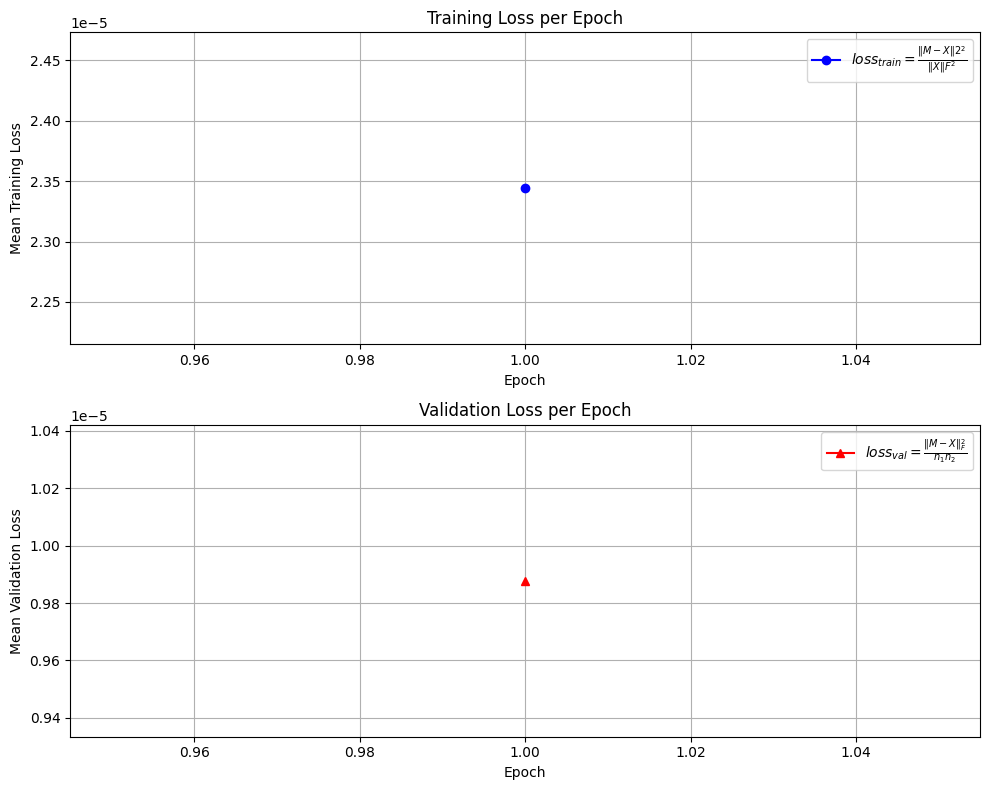

Project Name: Try 1 HuberMC-Net Q 30.0% DB 9.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:19:56, 

Epoch [1/1], Mean Training Loss:2.15454e-05, Mean Validation Loss:8.98681e-06


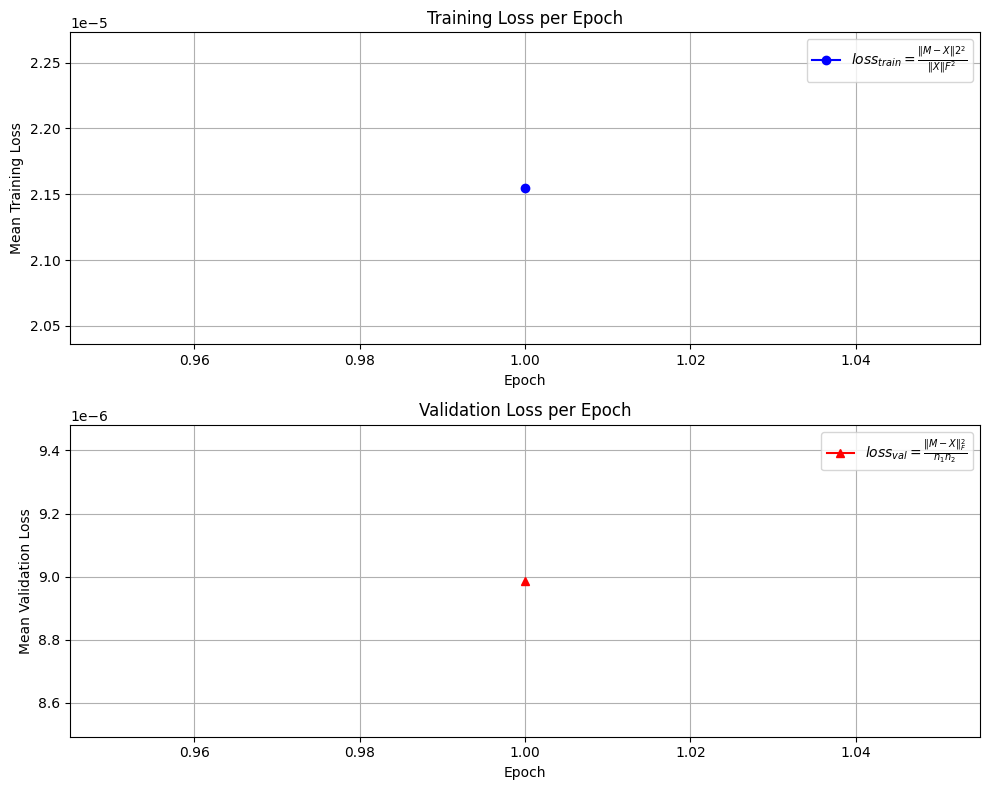

Project Name: Try 1 HuberMC-Net Q 40.0% DB 3.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:20:54, 

Epoch [1/1], Mean Training Loss:1.00847e-05, Mean Validation Loss:3.74708e-06


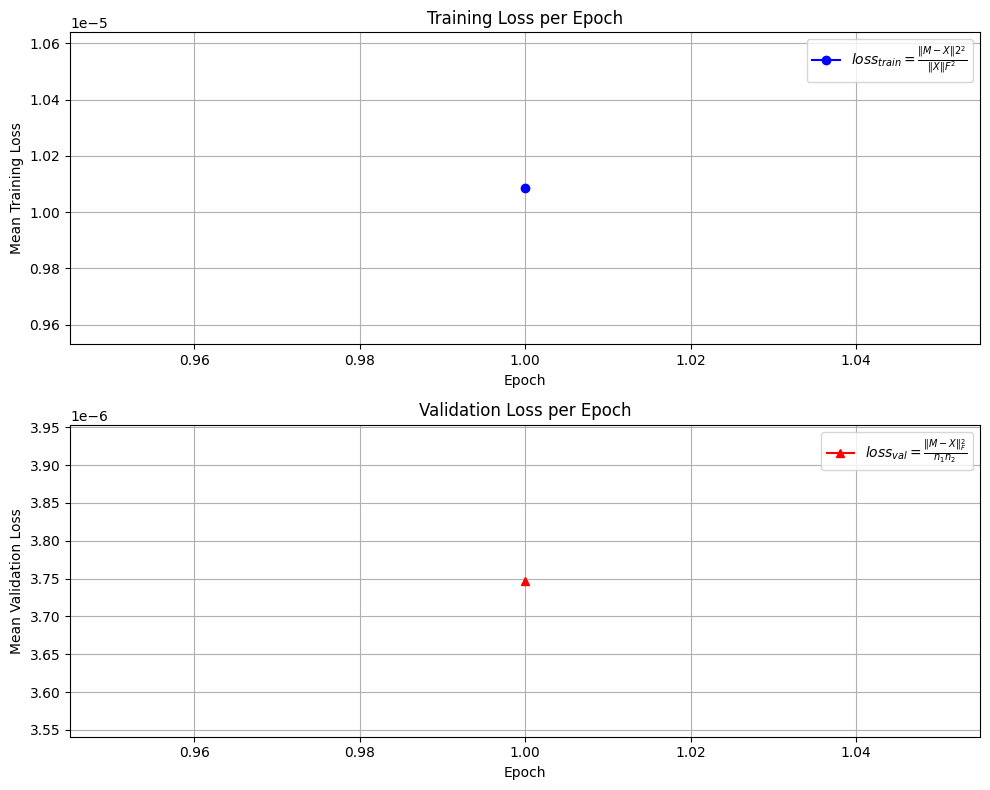

Project Name: Try 1 HuberMC-Net Q 40.0% DB 5.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:21:46, 

Epoch [1/1], Mean Training Loss:9.64407e-06, Mean Validation Loss:2.65325e-06


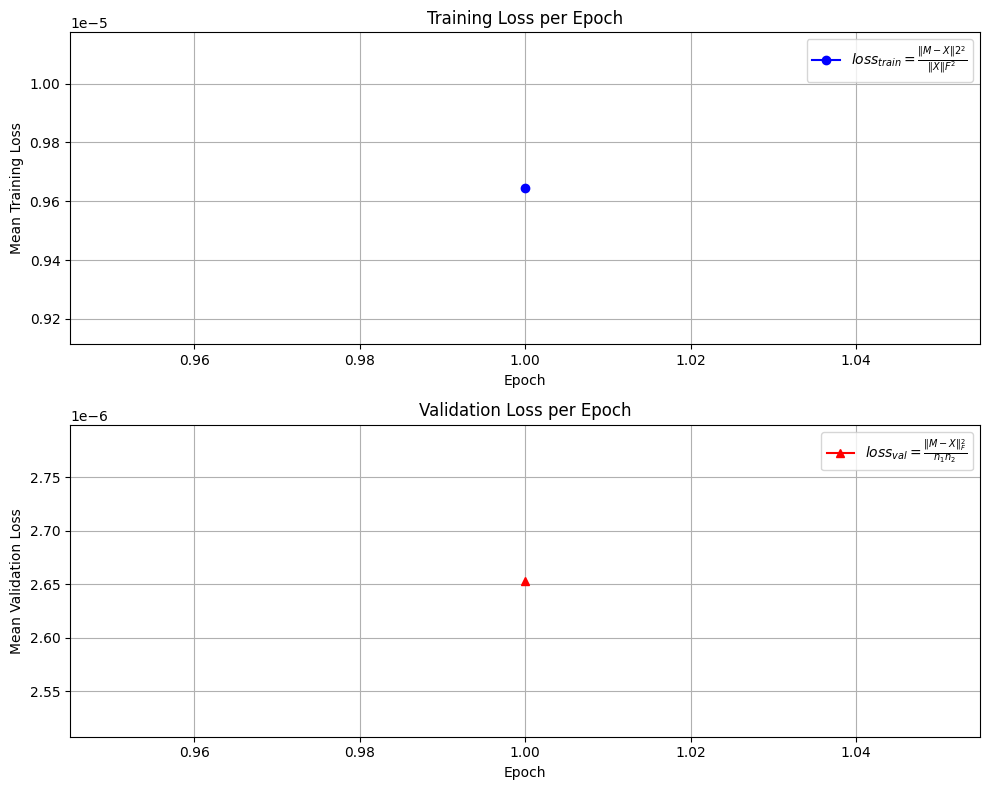

Project Name: Try 1 HuberMC-Net Q 40.0% DB 6.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:22:35, 

Epoch [1/1], Mean Training Loss:8.89564e-06, Mean Validation Loss:3.51295e-06


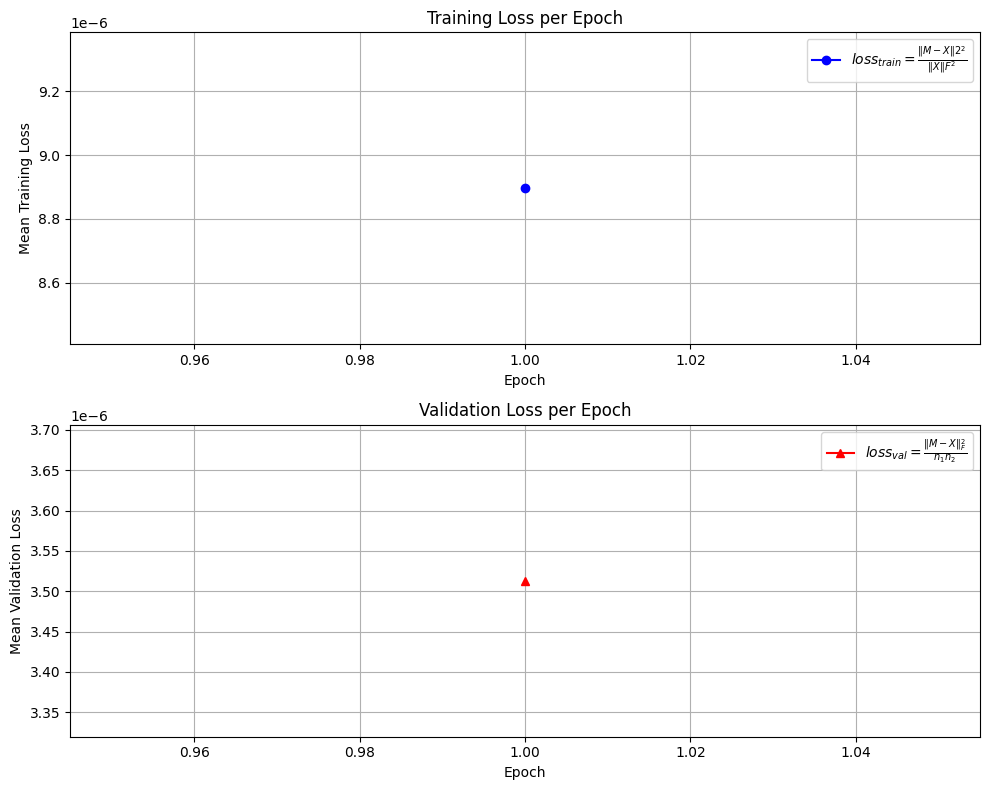

Project Name: Try 1 HuberMC-Net Q 40.0% DB 9.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:23:35, 

Epoch [1/1], Mean Training Loss:8.43080e-06, Mean Validation Loss:3.55337e-06


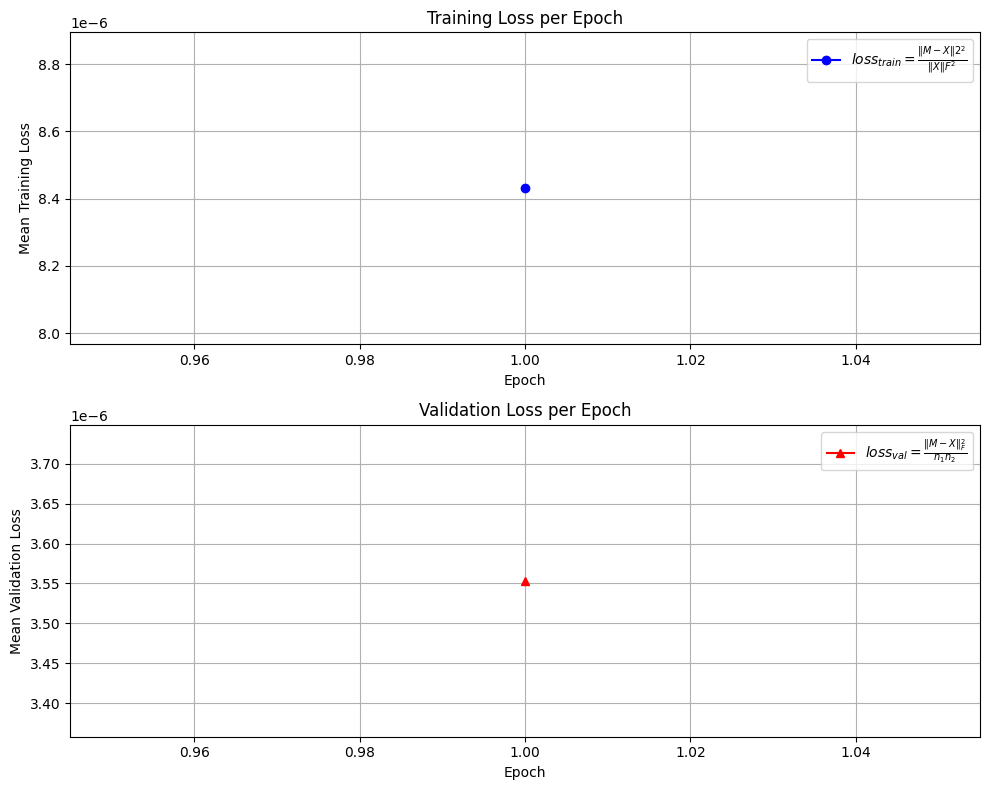

Project Name: Try 1 HuberMC-Net Q 50.0% DB 3.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:24:36, 

Epoch [1/1], Mean Training Loss:4.37777e-06, Mean Validation Loss:1.58201e-06


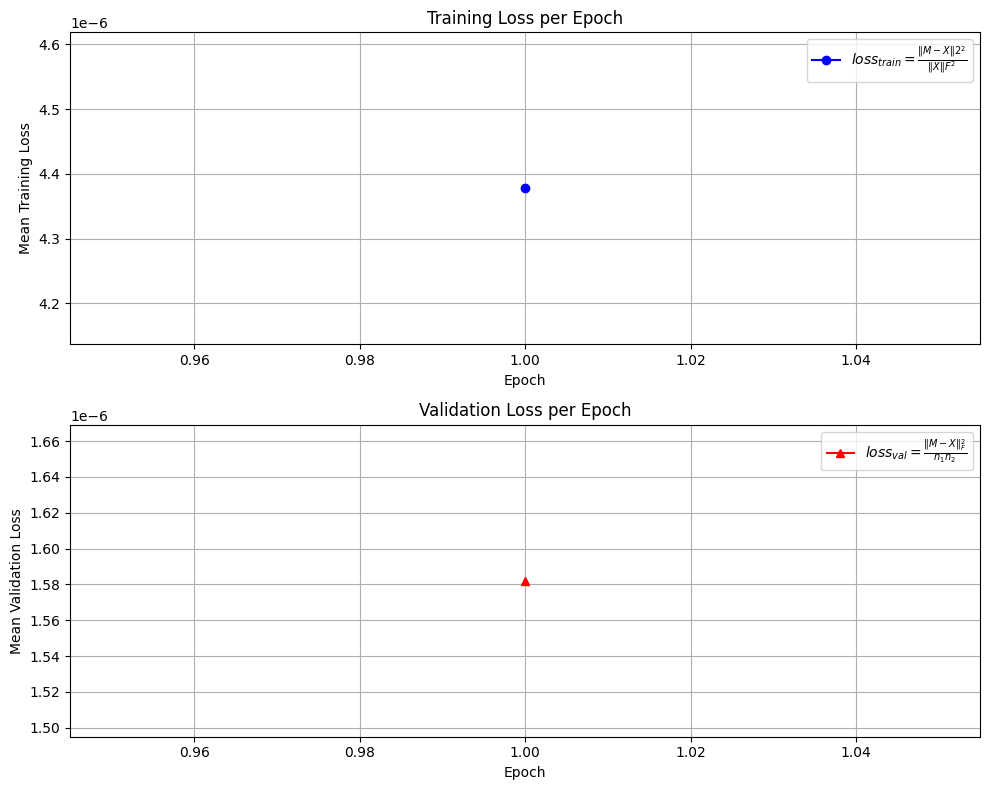

Project Name: Try 1 HuberMC-Net Q 50.0% DB 5.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:25:30, 

Epoch [1/1], Mean Training Loss:3.76590e-06, Mean Validation Loss:1.21219e-06


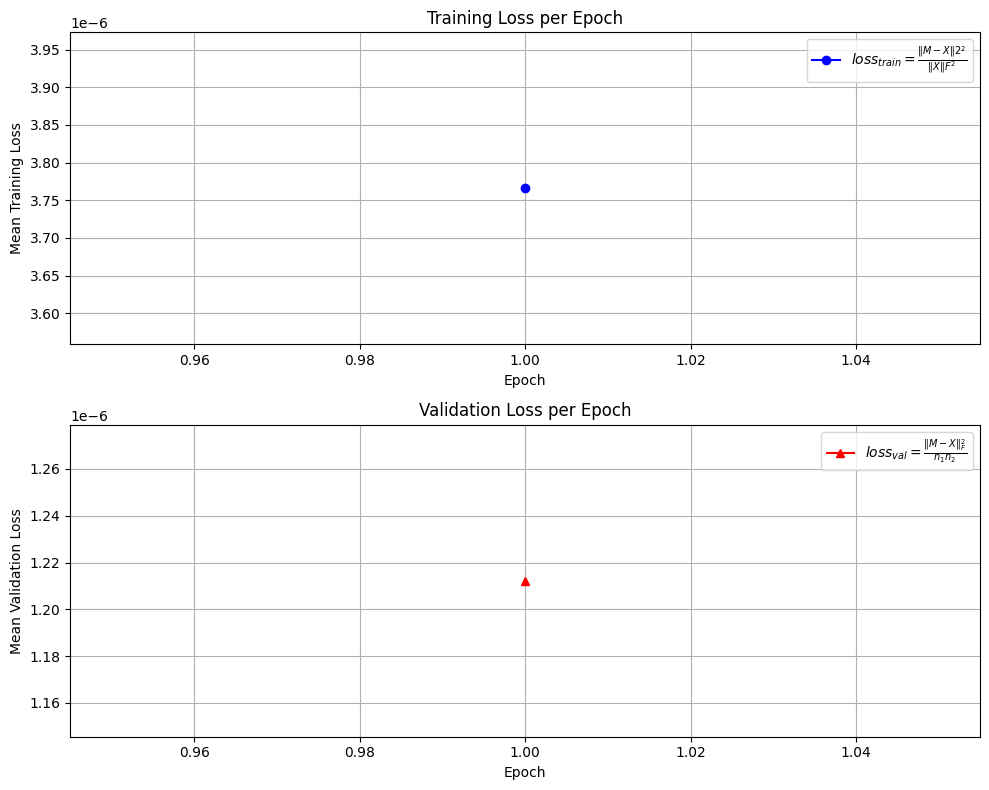

Project Name: Try 1 HuberMC-Net Q 50.0% DB 6.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:26:19, 

Epoch [1/1], Mean Training Loss:3.31633e-06, Mean Validation Loss:1.48451e-06


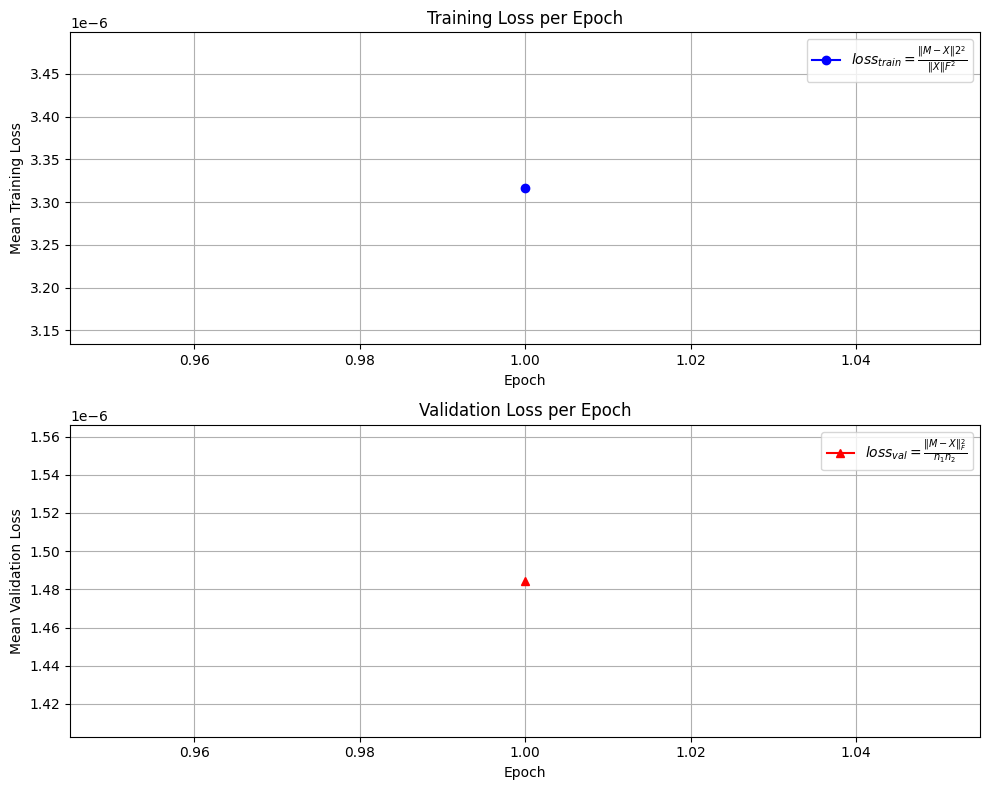

Project Name: Try 1 HuberMC-Net Q 50.0% DB 9.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:27:17, 

Epoch [1/1], Mean Training Loss:3.10636e-06, Mean Validation Loss:1.13024e-06


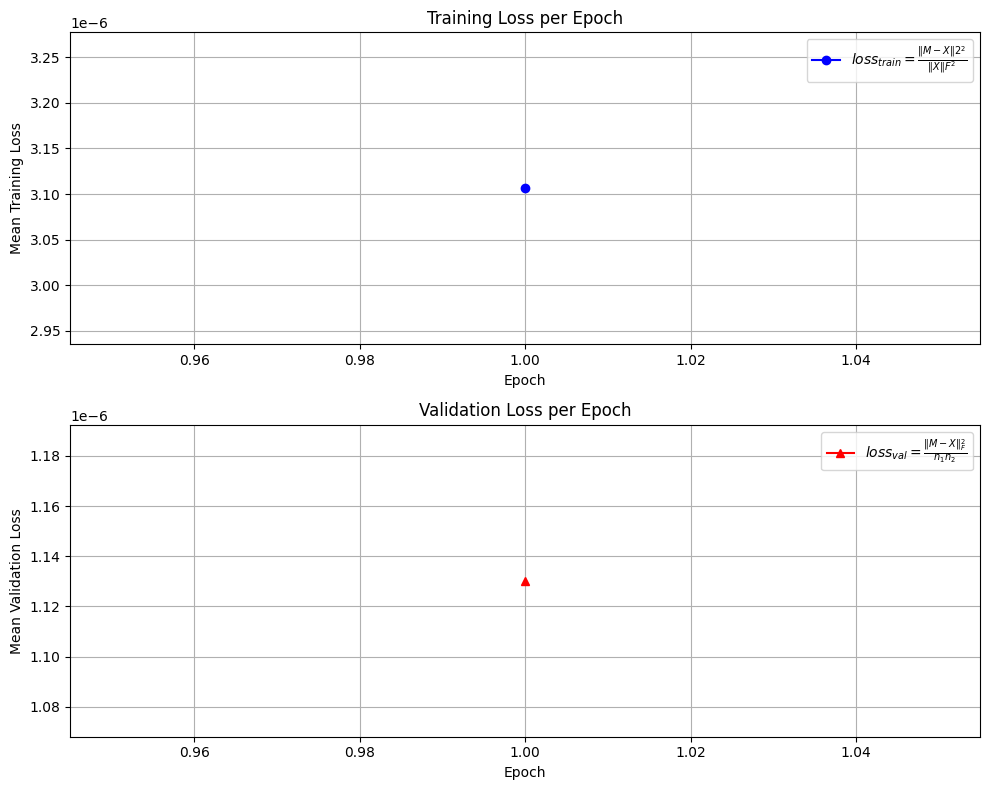

Project Name: Try 1 HuberMC-Net Q 60.0% DB 3.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:28:15, 

Epoch [1/1], Mean Training Loss:2.10089e-06, Mean Validation Loss:5.92013e-07


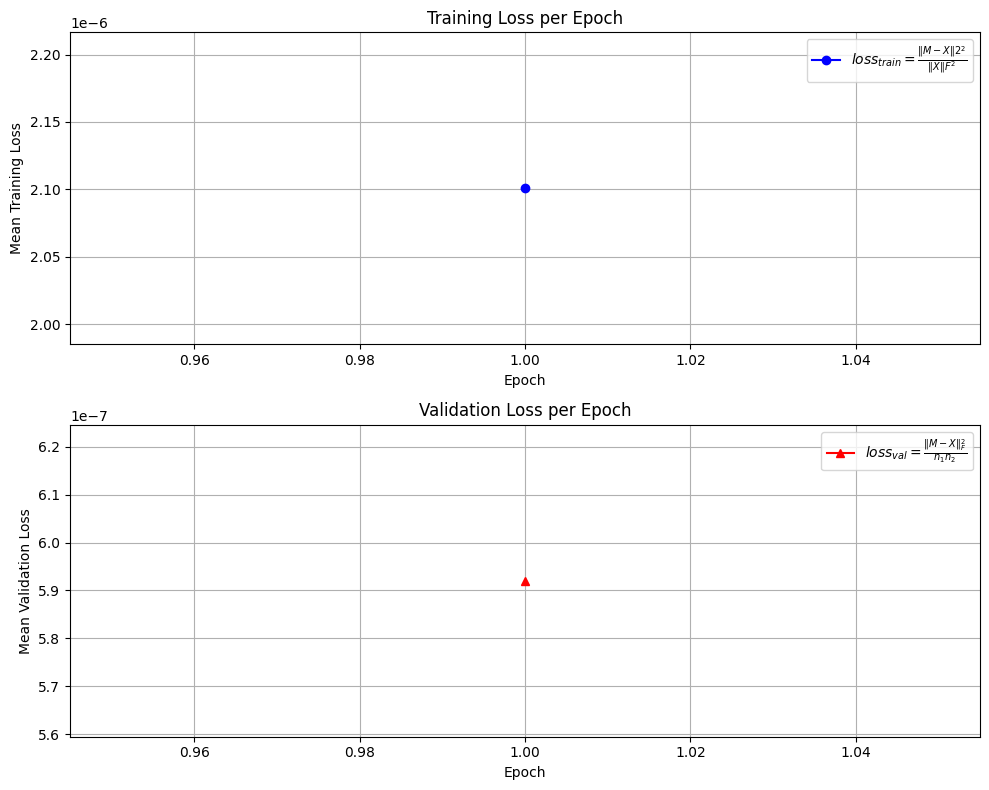

Project Name: Try 1 HuberMC-Net Q 60.0% DB 5.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:29:09, 

Epoch [1/1], Mean Training Loss:1.92570e-06, Mean Validation Loss:6.44487e-07


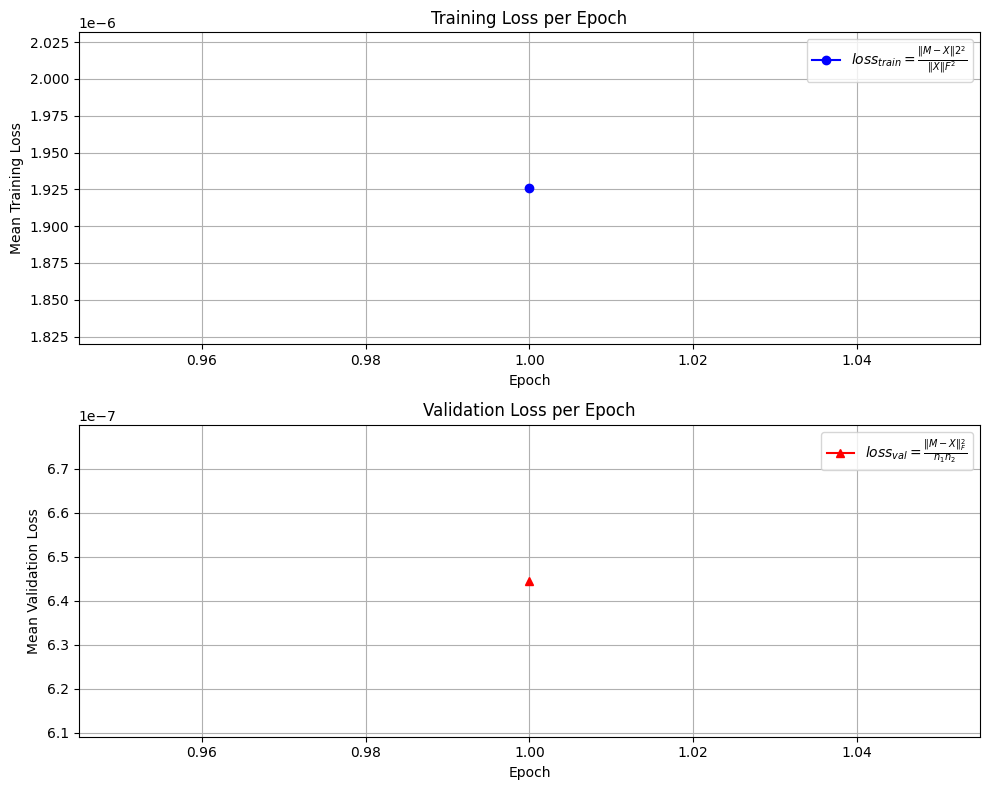

Project Name: Try 1 HuberMC-Net Q 60.0% DB 6.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:29:57, 

Epoch [1/1], Mean Training Loss:1.54972e-06, Mean Validation Loss:7.24439e-07


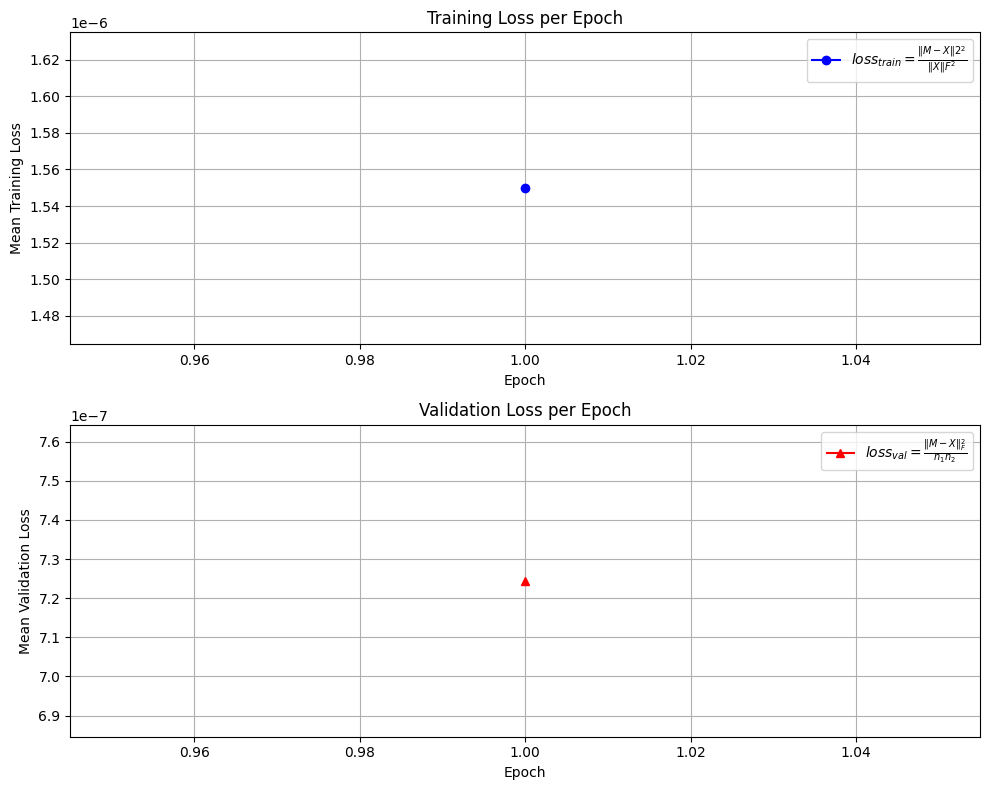

Project Name: Try 1 HuberMC-Net Q 60.0% DB 9.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:30:56, 

Epoch [1/1], Mean Training Loss:1.49882e-06, Mean Validation Loss:5.30339e-07


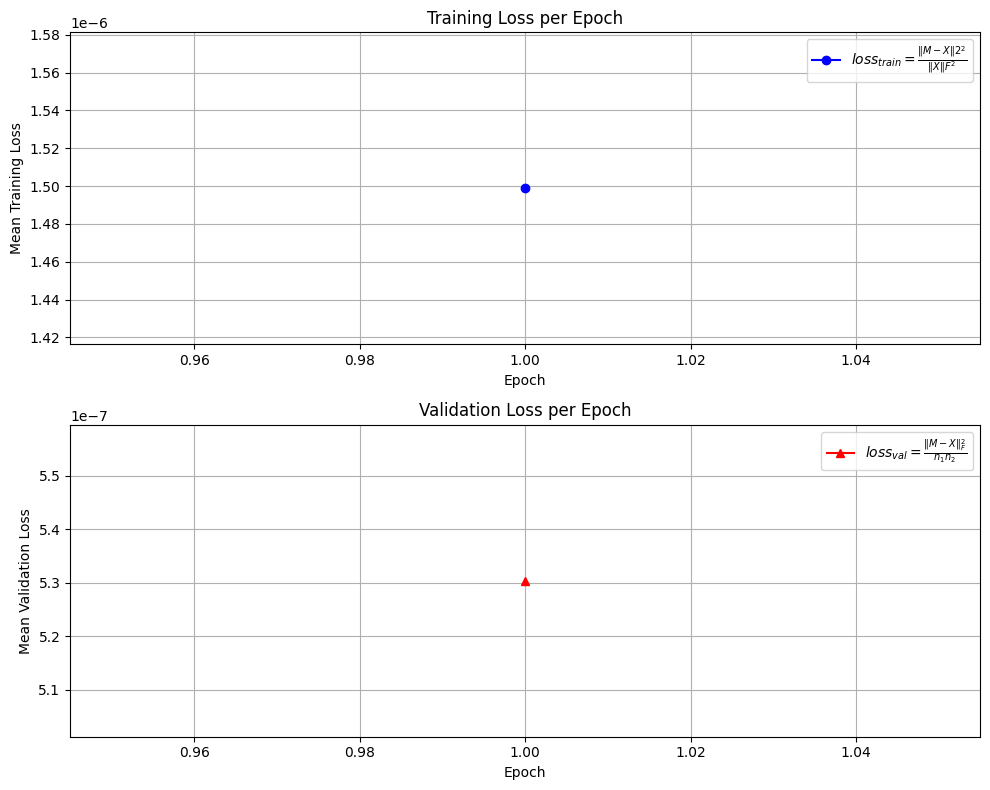

Project Name: Try 1 HuberMC-Net Q 70.0% DB 3.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:31:54, 

Epoch [1/1], Mean Training Loss:1.19288e-06, Mean Validation Loss:3.84491e-07


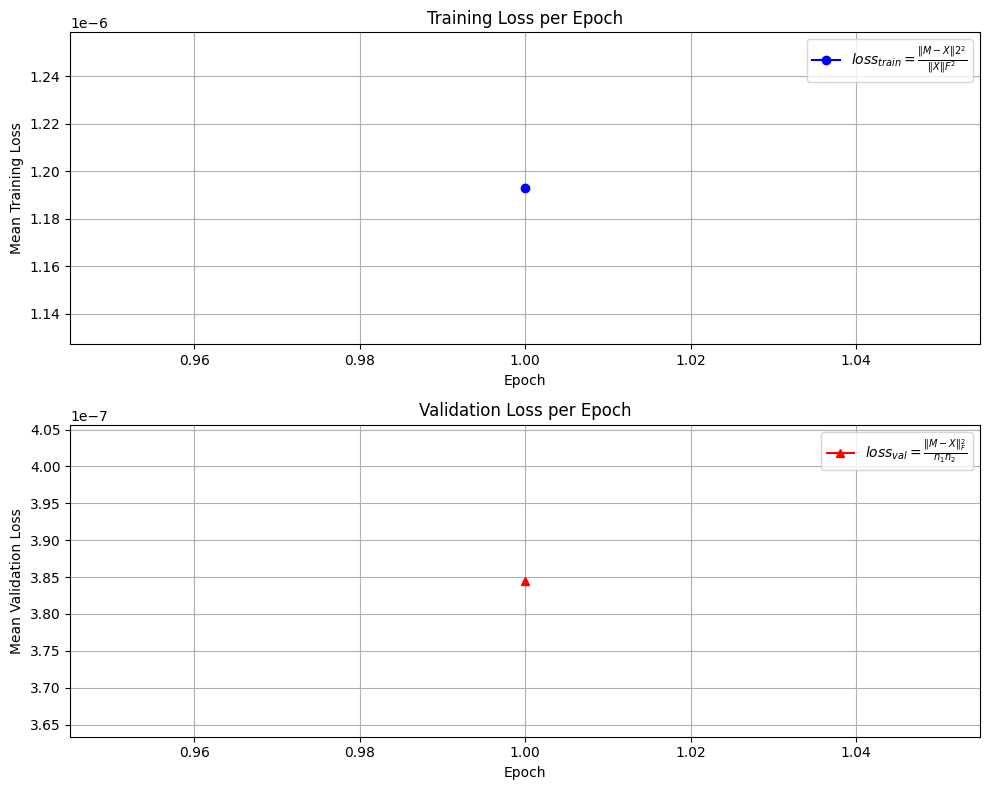

Project Name: Try 1 HuberMC-Net Q 70.0% DB 5.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:32:47, 

Epoch [1/1], Mean Training Loss:7.42464e-07, Mean Validation Loss:1.80702e-07


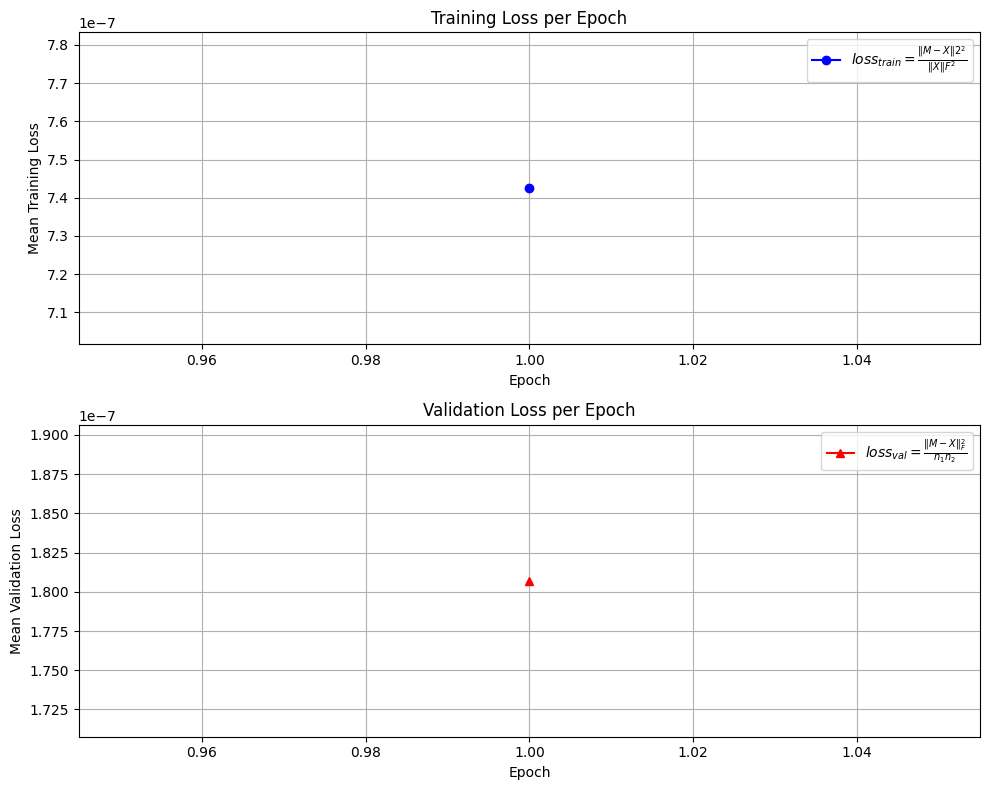

Project Name: Try 1 HuberMC-Net Q 70.0% DB 6.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:33:37, 

Epoch [1/1], Mean Training Loss:7.91898e-07, Mean Validation Loss:4.02348e-07


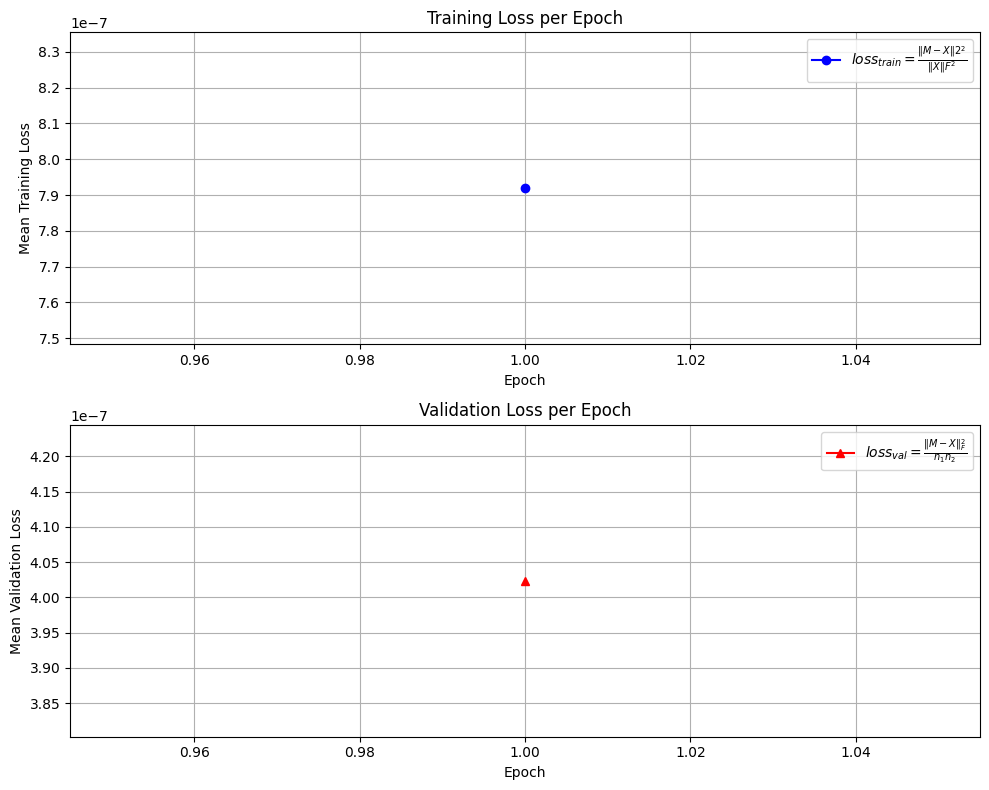

Project Name: Try 1 HuberMC-Net Q 70.0% DB 9.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:34:36, 

Epoch [1/1], Mean Training Loss:5.65173e-07, Mean Validation Loss:1.27133e-07


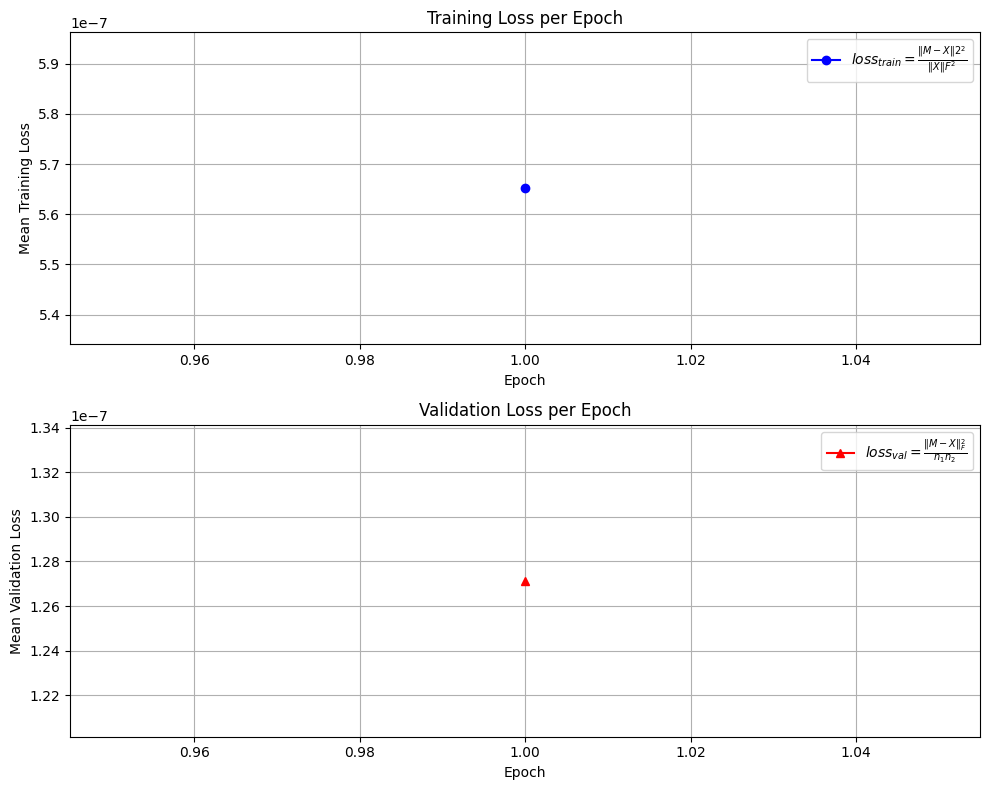

Project Name: Try 1 HuberMC-Net Q 80.0% DB 3.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-02 23:35:34, 

Epoch [1/1], Mean Training Loss:8.25096e-07, Mean Validation Loss:3.27677e-07


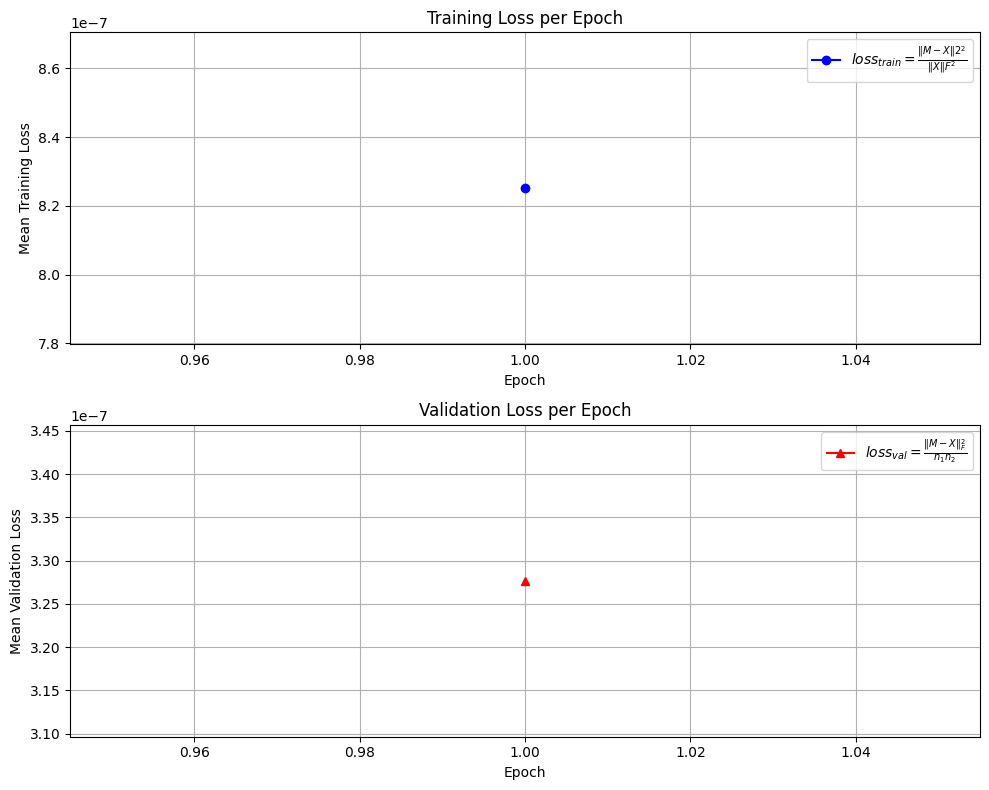

Project Name: Try 1 HuberMC-Net Q 80.0% DB 5.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-03 04:42:58, 

Epoch [1/1], Mean Training Loss:4.24139e-07, Mean Validation Loss:1.42253e-07


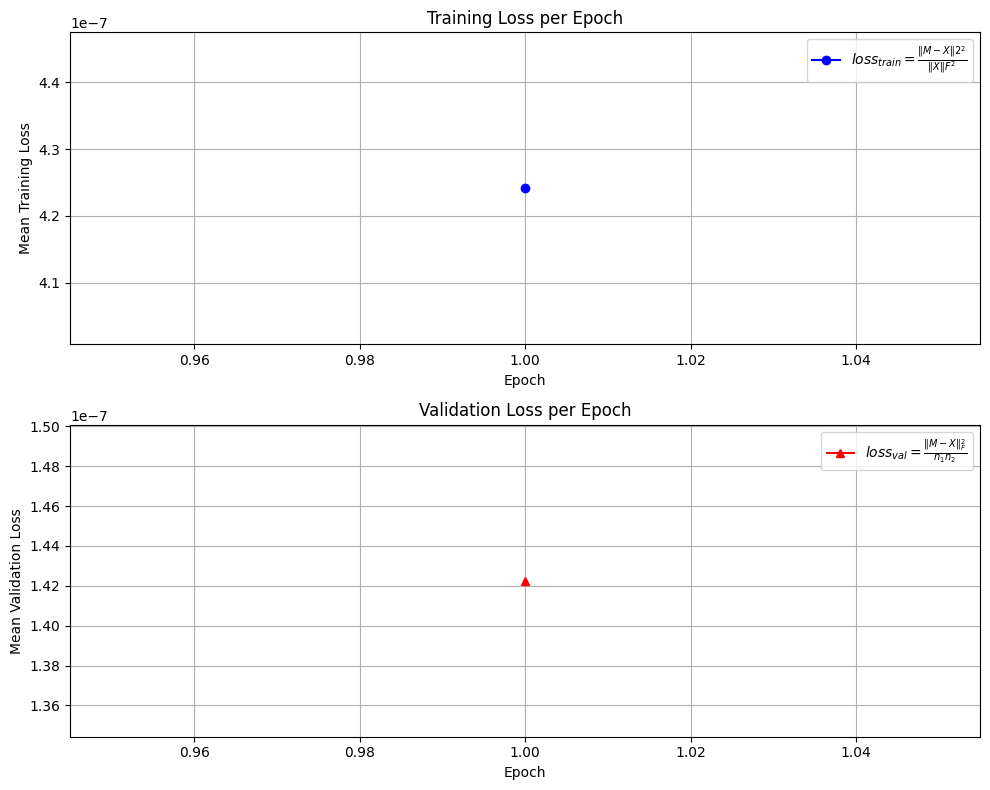

Project Name: Try 1 HuberMC-Net Q 80.0% DB 6.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-03 04:43:45, 

Epoch [1/1], Mean Training Loss:4.62552e-07, Mean Validation Loss:2.12406e-07


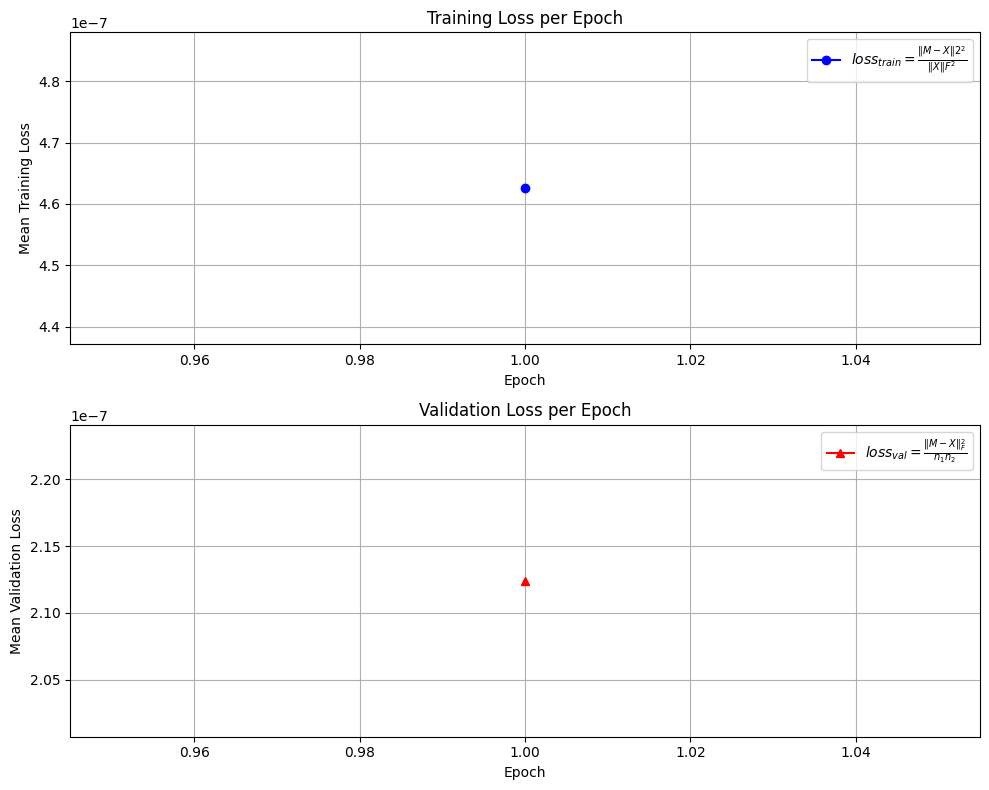

Project Name: Try 1 HuberMC-Net Q 80.0% DB 9.0

Configuring Network...
Instantiating Model...
Model Instantiated...

Parameters = 
{'size1': 150, 'size2': 300, 'rank': 10, 'device': 'cpu', 'hubreg_iters': 2, 'layers': 3, 'kernel': (3, 3), 'CalInGPU': False}

Epoch: 1, 2024-07-03 04:44:35, 

Epoch [1/1], Mean Training Loss:3.13476e-07, Mean Validation Loss:9.58181e-08


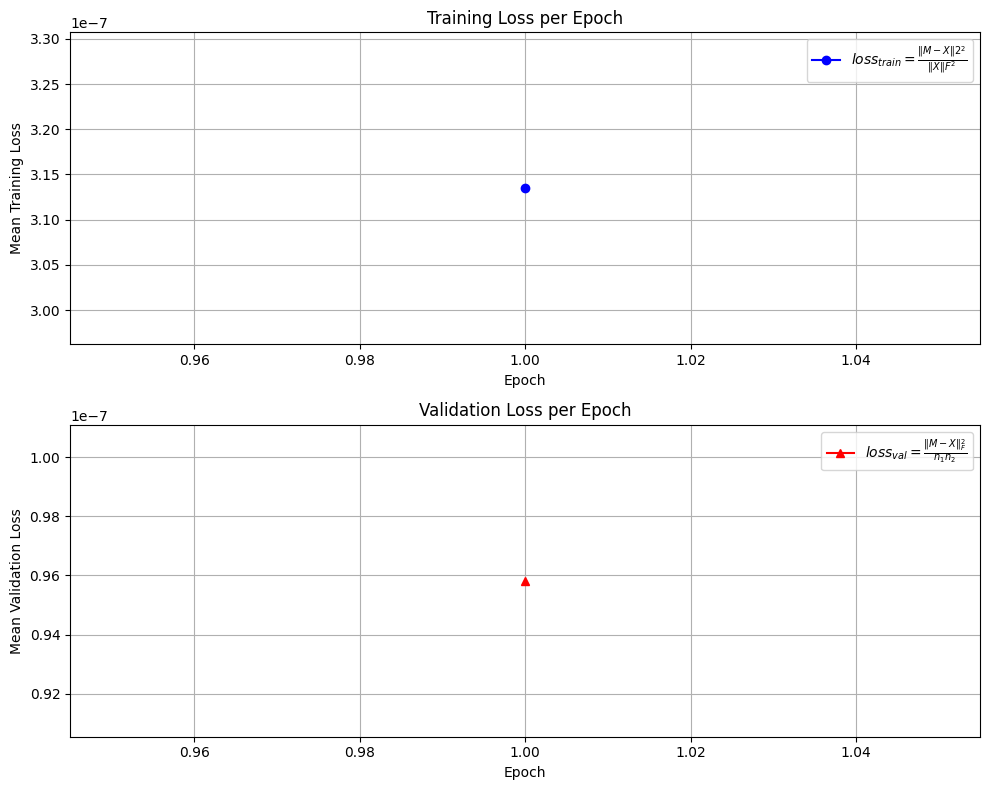

In [7]:
# Some settings for visualisation
matplotlib.use('Agg')
%matplotlib inline

seed = 123
torch.manual_seed(seed)

# Set parameters (including hyperparameters) and setting for saving/logging data
hyper_param_net = training.get_hyperparameter_grid('HuberMC-Net', TrainInstances = 20, ValInstances = 10, BatchSize = 5, ValBatchSize = 2, num_epochs = 1, learning_rate = 0.001, )
params_net = get_default_param(gpu = False, model = 'HuberMC-Net')
CalInGPU = params_net['CalInGPU']

q_list = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
db_list = [3.0, 5.0, 6.0, 9.0]

for q in q_list:
    for db in db_list:
        # ProjectName = TRY + ' ' + logs_and_results.get_current_time() + ' ' + hyper_param_net['Model'] + ' ' + 'Sampling Rate: ' + logs_and_results.get_q_str(q) + ' and DB ' + logs_and_results.get_noise_str(db)

        ProjectName = TRY + ' ' + hyper_param_net['Model'] + ' Q ' + logs_and_results.get_q_str(q) + ' DB ' + logs_and_results.get_noise_str(db)
        # Note: Removed time stamp from log file name as : not supported. Weird because this was not a problem in linux

        # Get log file
        logfile = logs_and_results.get_modularized_record(ProjectName, q, db, 'Logs', hyper_param_net, params_net, ROOT, SESSION)
        with open(logfile, 'w', 1) as log:
            print('Project Name: %s\n'%ProjectName)
            log.write('Project Name: %s\n\n'%ProjectName)

            # Get Model
            net = training.get_model(params_net, hyper_param_net, log)
            print('\nParameters = \n%s\n'%str(params_net))
            log.write('\nParameters = \n%s\n\n'%str(params_net))

            #Loading data and creating dataloader for both test and training
            # print('Loading Data phase...')
            log.write('Loading phase...\n')
            shape_dset = (params_net['size1'], params_net['size2'])
            
            train_loader, val_loader = dataset_processing.get_dataloaders(params_net = params_net, hyper_param_net = hyper_param_net, sampling_rate = q, db = db, ROOT = ROOT)

            # print('Finished loading.\n')
            log.write('Finished loading.\n\n')

            # Some additional settings for training including loss, optimizer,
            # floss = nn.functional.mse_loss(reduction = 'sum')
            floss = nn.MSELoss()
            optimizer = torch.optim.Adam(net.parameters(), lr = hyper_param_net['Lr'])
            # scheduler2 =  torch.optim.lr_scheduler.StepLR(optimizer, step_size= 1, gamma = 0.97, verbose = True)

            # Array for recording parameter values after each layer for each epoch etc
            outputs_L = revised_architecture.to_var(torch.zeros([shape_dset[0], shape_dset[1]]), CalInGPU) 
            lossmean_vec = np.zeros((hyper_param_net['Epochs'], ))
            lossmean_val_vec = np.zeros((hyper_param_net['Epochs'], ))


            # dummy variable to monitor and record progress for loss
            minloss = np.inf

            for epoch in range(hyper_param_net['Epochs']):
                print(f'Epoch: {epoch + 1}, {logs_and_results.get_current_time()}, \n')
                log.write(f'Epoch: {epoch + 1} ')
                log.write(logs_and_results.get_current_time() + '\n\n')

                # Train and Test Steps. (Record every 5 epochs)
                if (epoch + 1) % 5 == 0:
                    # print('Loading and calculating training batches...')
                    log.write('Loading and calculating training batches...\n')
                    startime = time.time()
                    loss_mean = training.train_step(net, train_loader, floss, optimizer, CalInGPU, hyper_param_net['TrainInstances'], hyper_param_net['BatchSize']) # remove alpha from train func
                    endtime = time.time()
                    # print('Training time is %f'%(endtime - startime))
                    log.write('Training time is %f'%(endtime - startime))

                    # print('Loading and calculating validation batches...')
                    log.write('Loading and calculating validation batches...\n')
                    startime = time.time()
                    loss_val_mean = training.test_step(net, val_loader, floss, CalInGPU, hyper_param_net['ValInstances'], hyper_param_net['ValBatchSize'])
                    endtime = time.time()
                    # print('Test time is %f'%(endtime - startime))
                    log.write('Test time is %f'%(endtime - startime))

                else:
                    loss_mean = training.train_step(net, train_loader, floss, optimizer, CalInGPU, hyper_param_net['TrainInstances'], hyper_param_net['BatchSize'])
                    loss_val_mean = training.test_step(net, val_loader, floss, CalInGPU, hyper_param_net['ValInstances'], hyper_param_net['ValBatchSize'])

                # Update Record and Parameters
                lossmean_vec[epoch] = loss_mean
                lossmean_val_vec[epoch] = loss_val_mean


                print('Epoch [%d/%d], Mean Training Loss:%.5e, Mean Validation Loss:%.5e'
                      %(epoch + 1, hyper_param_net['Epochs'], loss_mean, loss_val_mean))

                # Update Log after every 5 epochs. Make a plot of MSE against epochs every 5 epochs. Save Model in whole/dict form every five epochs.
                if (epoch + 1) % 5 == 0:
                    print(f"Saving Whole Model at Epochs: [{epoch + 1}/{hyper_param_net['Epochs']}]")
                    model_whole_path = logs_and_results.get_modularized_record(ProjectName, q, db, 'Saved Models - Whole', hyper_param_net, params_net, ROOT, SESSION, current_epoch = epoch + 1)
                    # torch.save(net, model_whole_path)
                    print(f"Saving Model Dict at Epochs: [{epoch + 1}/{hyper_param_net['Epochs']}]")
                    model_state_dict_path = logs_and_results.get_modularized_record(ProjectName, q, db, 'Saved Models - Dict', hyper_param_net, params_net, ROOT, SESSION, current_epoch = epoch + 1)
                    # torch.save(net.state_dict(), model_state_dict_path)

                    # print('Epoch [%d/%d], Mean Training Loss:%.5e, Mean Validation Loss:%.5e'
                    # %(epoch + 1, hyper_param_net['Epochs'], loss_mean, loss_val_mean))
                    # print('loss_lowrank_mean', loss_lowrank_mean)
                    # print('loss_val_lowrank_mean', loss_val_lowrank_mean)
                    # print(f'c: {c_list}, lamda: {lamda_list}, mu: {mu_list}')

                    # log.write('loss_lowrank_mean %.5e\n' %(loss_lowrank_mean))
                    # log.write('loss_val_lowrank_mean %.5e\n' %(loss_val_lowrank_mean))
                    log.write('Epoch [%d/%d], Mean Training Loss:%.5e, Mean Validation Loss:%.5e\n'
                              %(epoch + 1, hyper_param_net['Epochs'], loss_mean, loss_val_mean))
                    np.set_printoptions(precision = 3)

                    if True or loss_val_mean < minloss:
                        # print('saved at [epoch%d/%d]'%(epoch + 1, hyper_param_net['Epochs']))
                        log.write('saved at [epoch%d/%d]\n' %(epoch + 1, hyper_param_net['Epochs']))
                        minloss = min(loss_val_mean, minloss)

            # Finish off by observing the minimum loss on validation set

            #Print min loss
            # print('\nMin Loss = %.4e'%np.min(lossmean_val_vec))
            log.write('\nMin Loss = %.4e'%np.min(lossmean_val_vec))

            # Plotting MSE vs Epoch and Saving it

            # Get Directory where we have to save the plot
            dir = logs_and_results.get_modularized_record(ProjectName, q, db, 'Plots', hyper_param_net, params_net, ROOT, SESSION, current_epoch = epoch + 1)
            logs_and_results.plot_and_save_mse_vs_epoch(lossmean_vec, lossmean_val_vec, dir)

In [22]:
# Compiling all results in a single pdf

root_directory = r'C:/Users/Talha/OneDrive - Higher Education Commission/Documents/GitHub/ConvHuberMC/HuberMC_Data'
output_pdf = r'compiled_output2.pdf'  # path for the output PDF

png_files = img_pdf_compiler.collect_png_files(root_directory)
img_pdf_compiler.pngs_to_pdf(png_files, output_pdf)

Checking directory: C:/Users/Talha/OneDrive - Higher Education Commission/Documents/GitHub/ConvHuberMC/HuberMC_Data\Q 20.0%\DB 3.0\Plots\HuberMC-Net\Session 3
File found: Try 1 HuberMC-Net Q 20.0% DB 3.0 Layers_3_TrainInstances_20_Epochs_[1_out_of_1]_lr_0.001.png
Matched file: Try 1 HuberMC-Net Q 20.0% DB 3.0 Layers_3_TrainInstances_20_Epochs_[1_out_of_1]_lr_0.001.png
File found: Try 1 HuberMC-Net Q 20.0% DB 3.0 Layers_3_TrainInstances_20_Epochs_[20_out_of_20]_lr_0.001.png
Checking directory: C:/Users/Talha/OneDrive - Higher Education Commission/Documents/GitHub/ConvHuberMC/HuberMC_Data\Q 20.0%\DB 5.0\Plots\HuberMC-Net\Session 3
File found: Try 1 HuberMC-Net Q 20.0% DB 5.0 Layers_3_TrainInstances_20_Epochs_[1_out_of_1]_lr_0.001.png
Matched file: Try 1 HuberMC-Net Q 20.0% DB 5.0 Layers_3_TrainInstances_20_Epochs_[1_out_of_1]_lr_0.001.png
File found: Try 1 HuberMC-Net Q 20.0% DB 5.0 Layers_3_TrainInstances_20_Epochs_[20_out_of_20]_lr_0.001.png
Checking directory: C:/Users/Talha/OneDrive 